In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

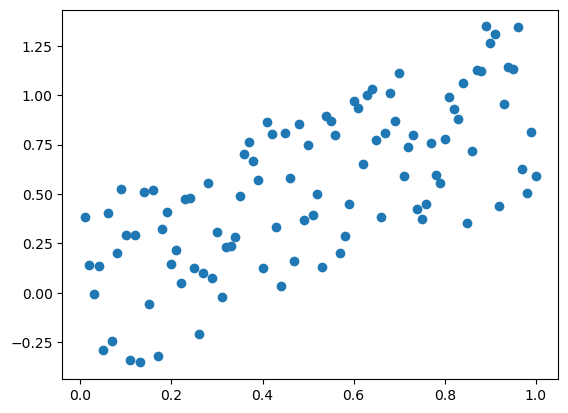

In [2]:
n = 100
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5


plt.scatter(x,y)

In [4]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [5]:
model.coef_, model.intercept_

(array([0.96896212]), 0.04357236705701417)

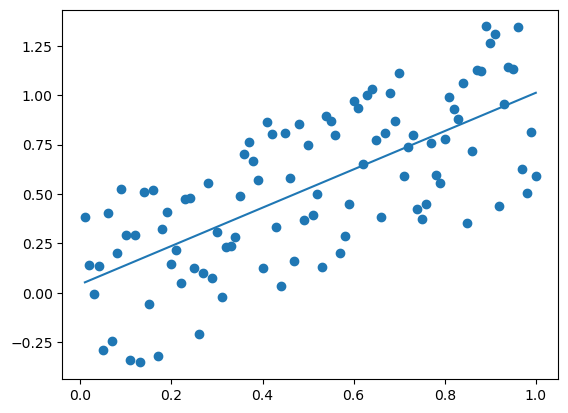

In [6]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## How do we "test" this model on "new" data if we don't have a new dataset?

### Instead of using all of our data to produce this model, let's use some, and save the rest as a reserve 

In [13]:
model = LinearRegression()
model.fit(x[:50], y[:50])
model.coef_, model.intercept_

(array([1.12550225]), 0.0026718352200578166)

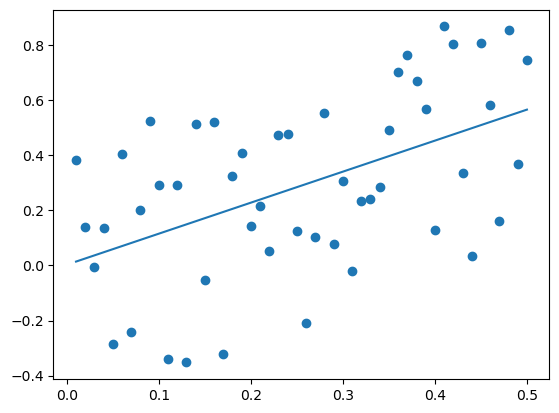

In [14]:
plt.scatter(x[:50],y[:50])
plt.plot(x[:50], np.dot(x[:50], model.coef_) + model.intercept_)

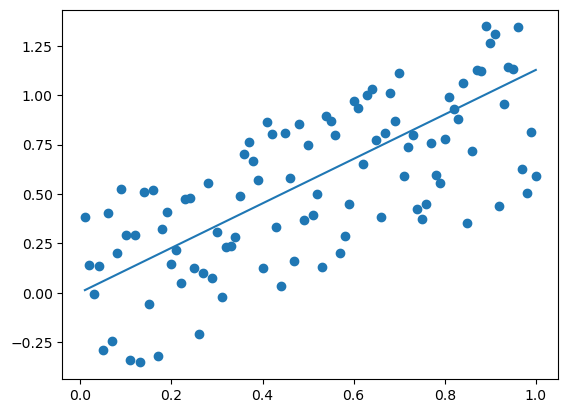

In [15]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## Our slope doesn't match the previous slope with all the data. Why not? 
## Let's plot all of our data with this model to see

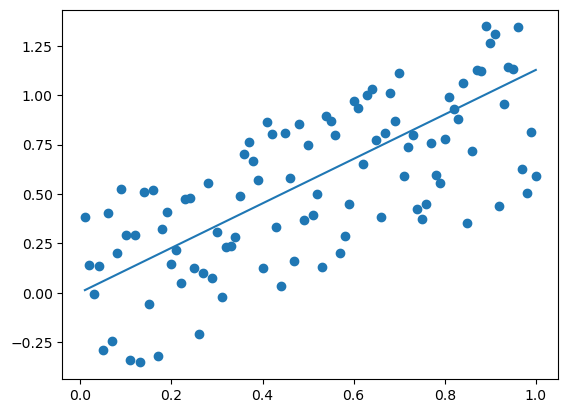

In [16]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## We only used the first half of our data and neglected the second half. 

### Let's try this again differently. Let's shuffle our data first

In [17]:
def shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return p

In [18]:
p = shuffle(x, y)

In [19]:
p

array([40, 37, 67, 85, 50, 49, 78, 33, 27, 30, 71, 87, 75,  4, 51, 12, 69,
       62, 72, 14, 70,  9, 36, 68,  1, 28, 63, 18, 23, 84,  8, 45, 47,  5,
       26, 20, 90, 43, 17, 77, 98, 60,  0, 94, 31, 99, 95, 48, 83, 97, 44,
       56, 96, 42, 59, 35, 53, 38, 82, 89, 92, 86, 39, 15, 29, 73, 54, 79,
       81, 22, 57, 66, 74, 65, 10, 24, 52, 21, 91,  3, 93, 19, 88, 11, 55,
       64,  6, 16, 41, 46, 32, 58, 80,  2, 25, 76, 34,  7, 61, 13])

In [20]:
x[[2, 0, 1, 4]]

array([[0.03],
       [0.01],
       [0.02],
       [0.05]])

In [21]:
x[[61, 27, 92]], y[[61, 27, 92]]

(array([[0.62],
        [0.28],
        [0.93]]),
 array([0.65096215, 0.5541117 , 0.9562705 ]))

In [22]:
x[p], y[p]

(array([[0.41],
        [0.38],
        [0.68],
        [0.86],
        [0.51],
        [0.5 ],
        [0.79],
        [0.34],
        [0.28],
        [0.31],
        [0.72],
        [0.88],
        [0.76],
        [0.05],
        [0.52],
        [0.13],
        [0.7 ],
        [0.63],
        [0.73],
        [0.15],
        [0.71],
        [0.1 ],
        [0.37],
        [0.69],
        [0.02],
        [0.29],
        [0.64],
        [0.19],
        [0.24],
        [0.85],
        [0.09],
        [0.46],
        [0.48],
        [0.06],
        [0.27],
        [0.21],
        [0.91],
        [0.44],
        [0.18],
        [0.78],
        [0.99],
        [0.61],
        [0.01],
        [0.95],
        [0.32],
        [1.  ],
        [0.96],
        [0.49],
        [0.84],
        [0.98],
        [0.45],
        [0.57],
        [0.97],
        [0.43],
        [0.6 ],
        [0.36],
        [0.54],
        [0.39],
        [0.83],
        [0.9 ],
        [0.93],
        [0.87],
        

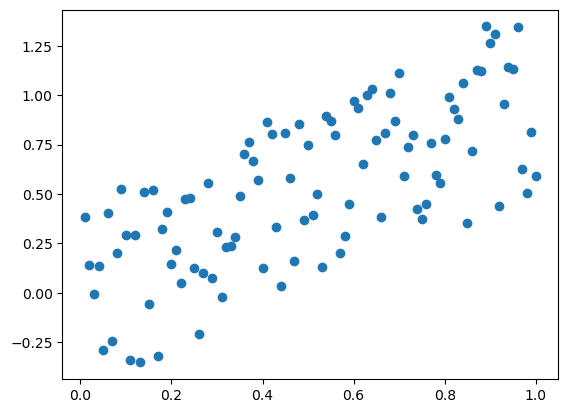

In [23]:
plt.scatter(x[p],y[p])

### Still plots the same scatter plot

### So, let's use the first 50 points of the shuffled data instead and see if the model is similar 

In [24]:
model = LinearRegression()
model.fit(x[p][:50], y[p][:50])
model.coef_, model.intercept_


(array([0.88852731]), 0.11032599872959281)

### Success! We got a similar slope as before with half of the points 

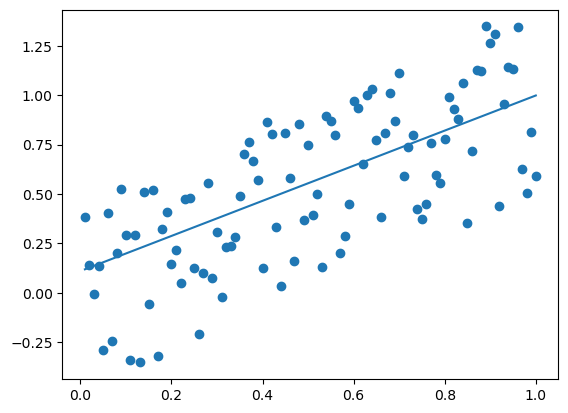

In [25]:

plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

###  So how do we check the validity of the model on the rest of the points? The loss (Error) function of course!
### $E = \Sigma err(y - \hat{y}) = \Sigma err(y - \beta \cdot x)$

### $E = \frac{1}{N}\Sigma err( y - \hat{y}) = \frac{1}{N}\Sigma err(y - \beta \cdot x)$
### Why divide by N? 
This way we have a _mean_ error that's invariant to the number of points you use to build your model. Otherwise, your error would increase with the number of points

In [26]:
x[50:]

array([[0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.66],
       [0.67],
       [0.68],
       [0.69],
       [0.7 ],
       [0.71],
       [0.72],
       [0.73],
       [0.74],
       [0.75],
       [0.76],
       [0.77],
       [0.78],
       [0.79],
       [0.8 ],
       [0.81],
       [0.82],
       [0.83],
       [0.84],
       [0.85],
       [0.86],
       [0.87],
       [0.88],
       [0.89],
       [0.9 ],
       [0.91],
       [0.92],
       [0.93],
       [0.94],
       [0.95],
       [0.96],
       [0.97],
       [0.98],
       [0.99],
       [1.  ]])

In [27]:
np.dot(x[50:], model.coef_) + model.intercept_

array([0.56347493, 0.5723602 , 0.58124547, 0.59013074, 0.59901602,
       0.60790129, 0.61678656, 0.62567184, 0.63455711, 0.64344238,
       0.65232766, 0.66121293, 0.6700982 , 0.67898348, 0.68786875,
       0.69675402, 0.70563929, 0.71452457, 0.72340984, 0.73229511,
       0.74118039, 0.75006566, 0.75895093, 0.76783621, 0.77672148,
       0.78560675, 0.79449203, 0.8033773 , 0.81226257, 0.82114784,
       0.83003312, 0.83891839, 0.84780366, 0.85668894, 0.86557421,
       0.87445948, 0.88334476, 0.89223003, 0.9011153 , 0.91000058,
       0.91888585, 0.92777112, 0.93665639, 0.94554167, 0.95442694,
       0.96331221, 0.97219749, 0.98108276, 0.98996803, 0.99885331])

In [28]:
y[50:] - (np.dot(x[50:], model.coef_) + model.intercept_)

array([-0.16729865, -0.07022667, -0.45084962,  0.30591856,  0.27279372,
        0.19196003, -0.4169476 , -0.33998454, -0.18290497,  0.32841493,
        0.2843966 , -0.01025078,  0.33081012,  0.35427858,  0.08498322,
       -0.31328173,  0.10311362,  0.29437552,  0.14781954,  0.38267911,
       -0.1514007 , -0.01331656,  0.03977955, -0.34506918, -0.40331282,
       -0.33673633, -0.03811818, -0.20484635, -0.25584471, -0.04042072,
        0.16108413,  0.09371382,  0.03227506,  0.20442498, -0.51016177,
       -0.15803123,  0.24220695,  0.23079545,  0.4469158 ,  0.35227229,
        0.38958436, -0.48771564,  0.0196141 ,  0.19786284,  0.17747613,
        0.37977418, -0.34690379, -0.47633157, -0.17613435, -0.40536232])

In [29]:
np.square(y[50:] - (np.dot(x[50:], model.coef_) + model.intercept_))

array([2.79888375e-02, 4.93178452e-03, 2.03265384e-01, 9.35861651e-02,
       7.44164159e-02, 3.68486519e-02, 1.73845298e-01, 1.15589490e-01,
       3.34542287e-02, 1.07856366e-01, 8.08814276e-02, 1.05078564e-04,
       1.09435336e-01, 1.25513313e-01, 7.22214806e-03, 9.81454441e-02,
       1.06324196e-02, 8.66569487e-02, 2.18506153e-02, 1.46443302e-01,
       2.29221721e-02, 1.77330690e-04, 1.58241283e-03, 1.19072739e-01,
       1.62661234e-01, 1.13391358e-01, 1.45299601e-03, 4.19620258e-02,
       6.54565168e-02, 1.63383422e-03, 2.59480961e-02, 8.78227935e-03,
       1.04167963e-03, 4.17895713e-02, 2.60265035e-01, 2.49738703e-02,
       5.86642044e-02, 5.32665380e-02, 1.99733733e-01, 1.24095769e-01,
       1.51775971e-01, 2.37866548e-01, 3.84713110e-04, 3.91497045e-02,
       3.14977751e-02, 1.44228425e-01, 1.20342238e-01, 2.26891769e-01,
       3.10233090e-02, 1.64318607e-01])

In [30]:
np.sum(np.square(y[50:] - (np.dot(x[50:], model.coef_) + model.intercept_)))

4.035021109372588

In [31]:
np.sum(np.square(y[p][50:] - (np.dot(x[p][50:], model.coef_) + model.intercept_)))/50

0.08175240155147608

### Is there a shorter way of calculating this error?
Why yes, of course! Scikit-Learn to the rescue

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(y[p][50:], np.dot(x[p][50:], model.coef_) + model.intercept_)

0.08175240155147608

### Why the slight discrepancy in values? 
Let's check the Documentation
[http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error]

Turns out sklearn sums N-1 values and not all N because Statistics
[http://stats.stackexchange.com/questions/17890/what-is-the-difference-between-n-and-n-1-in-calculating-population-variance]

## Is there an easier way to shuffle the data?
I'm glad you asked [http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [36]:
from sklearn.linear_model import Ridge

In [37]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([0.894879]), 0.026250578803577507)

In [38]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([1.10408567]), -0.0776832925265536)

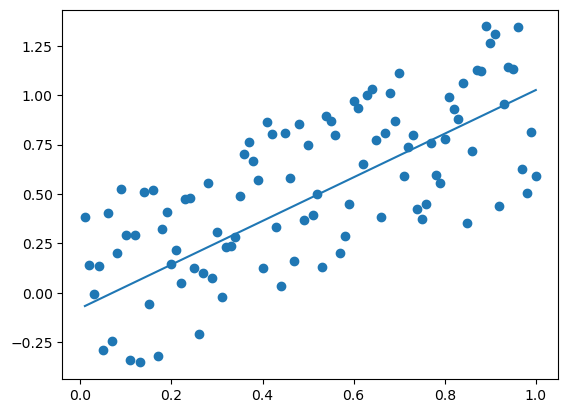

In [39]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

In [40]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.08648148426226195

In [41]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.08119403438248049

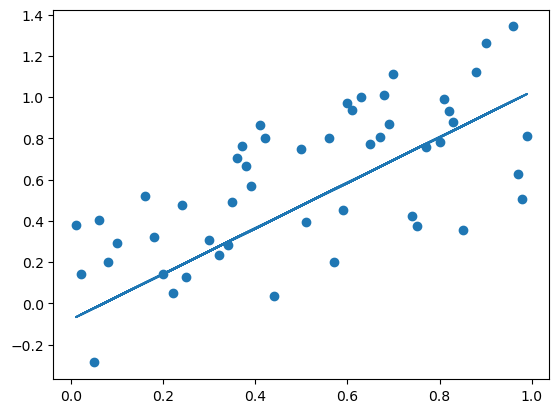

In [42]:
plt.scatter(x_test,y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_)

## Ridge 

In [43]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.08648148426226195

In [44]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.08119403438248049